In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, LeakyReLU, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

2024-05-16 03:07:29.953456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 03:07:29.953622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 03:07:30.134780: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
xlsx_dir = "/kaggle/input/mlms-dataset/Project data/filename.csv"

In [5]:
data = pd.read_csv(xlsx_dir, index_col = None)
data

,A11,A12,A21,A22,S.No,Path
0,5.5258,2.1858,9.1255,0,1,/kaggle/input/mlms-dataset/Project data/1.tiff
1,7.2641,0.1932,8.8886,0,2,/kaggle/input/mlms-dataset/Project data/2.tiff
2,0.7568,1.3561,11.6780,0,3,/kaggle/input/mlms-dataset/Project data/3.tiff
3,0.7937,1.5582,9.6684,0,4,/kaggle/input/mlms-dataset/Project data/4.tiff
4,11.9680,-1.3073,11.5860,0,5,/kaggle/input/mlms-dataset/Project data/5.tiff
...,...,...,...,...,...,...
9995,3.7611,-1.4850,12.3820,0,9996,/kaggle/input/mlms-dataset/Project data/9996.tiff
9996,5.3362,0.5816,11.6610,0,9997,/kaggle/input/mlms-dataset/Project data/9997.tiff
9997,7.8411,-1.6626,2.9202,0,9998,/kaggle/input/mlms-dataset/Project data/9998.tiff
9998,11.3070,-0.0361,6.1162,0,9999,/kaggle/input/mlms-dataset/Project data/9999.tiff


In [50]:
a11 = data["A11"]
a12 = data["A12"]
a21 = data["A21"]

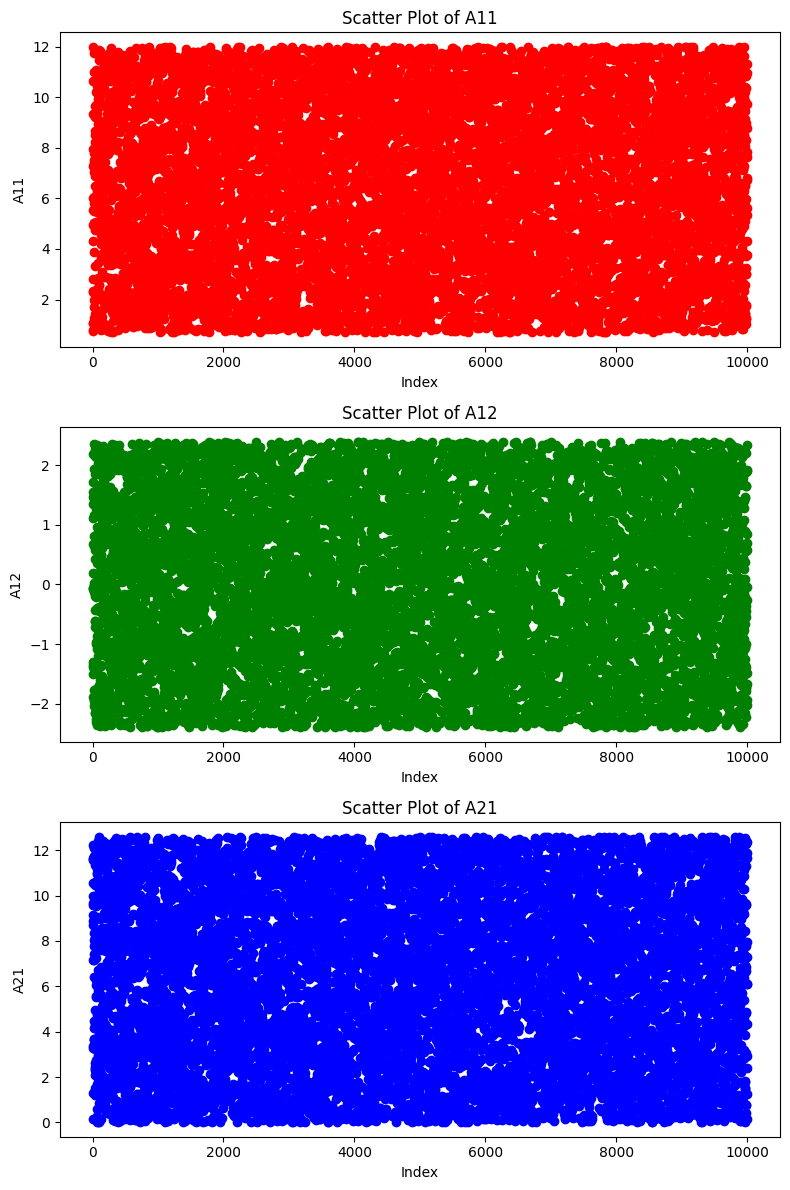

In [51]:
x = list(range(len(a11)))

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Subplot 1
axs[0].scatter(x, a11, color='r')
axs[0].set_title('Scatter Plot of A11')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('A11')

# Subplot 2
axs[1].scatter(x, a12, color='g')
axs[1].set_title('Scatter Plot of A12')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('A12')

# Subplot 3
axs[2].scatter(x, a21, color='b')
axs[2].set_title('Scatter Plot of A21')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('A21')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, train_size=0.85, shuffle=False, random_state=1)

In [7]:
train_df

,A11,A12,A21,A22,S.No,Path
0,5.5258,2.1858,9.1255,0,1,/kaggle/input/mlms-dataset/Project data/1.tiff
1,7.2641,0.1932,8.8886,0,2,/kaggle/input/mlms-dataset/Project data/2.tiff
2,0.7568,1.3561,11.6780,0,3,/kaggle/input/mlms-dataset/Project data/3.tiff
3,0.7937,1.5582,9.6684,0,4,/kaggle/input/mlms-dataset/Project data/4.tiff
4,11.9680,-1.3073,11.5860,0,5,/kaggle/input/mlms-dataset/Project data/5.tiff
...,...,...,...,...,...,...
8495,11.6780,0.0053,5.9952,0,8496,/kaggle/input/mlms-dataset/Project data/8496.tiff
8496,11.9920,1.0420,5.9193,0,8497,/kaggle/input/mlms-dataset/Project data/8497.tiff
8497,0.9148,0.0733,8.7858,0,8498,/kaggle/input/mlms-dataset/Project data/8498.tiff
8498,1.5445,-2.0067,7.8569,0,8499,/kaggle/input/mlms-dataset/Project data/8499.tiff


In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, train_size=0.85, shuffle=False, random_state=1)

In [10]:
train_df

,A11,A12,A21,A22,S.No,Path
0,5.5258,2.1858,9.1255,0,1,/kaggle/input/mlms-dataset/Project data/1.tiff
1,7.2641,0.1932,8.8886,0,2,/kaggle/input/mlms-dataset/Project data/2.tiff
2,0.7568,1.3561,11.6780,0,3,/kaggle/input/mlms-dataset/Project data/3.tiff
3,0.7937,1.5582,9.6684,0,4,/kaggle/input/mlms-dataset/Project data/4.tiff
4,11.9680,-1.3073,11.5860,0,5,/kaggle/input/mlms-dataset/Project data/5.tiff
...,...,...,...,...,...,...
8495,11.6780,0.0053,5.9952,0,8496,/kaggle/input/mlms-dataset/Project data/8496.tiff
8496,11.9920,1.0420,5.9193,0,8497,/kaggle/input/mlms-dataset/Project data/8497.tiff
8497,0.9148,0.0733,8.7858,0,8498,/kaggle/input/mlms-dataset/Project data/8498.tiff
8498,1.5445,-2.0067,7.8569,0,8499,/kaggle/input/mlms-dataset/Project data/8499.tiff


In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [12]:
columns = ["A11", "A12", "A21"]

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Path",
    y_col=columns,
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Path",
    y_col=columns,
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="Path",
    y_col=columns,
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 6800 validated image filenames.
Found 1700 validated image filenames.
Found 1500 validated image filenames.


In [14]:
train_images[0][0].shape

(32, 256, 256, 1)

In [15]:
len(train_images[0][1][1])

3

In [16]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model

In [17]:
img_size = 256
img_input = layers.Input(shape=(img_size, img_size, 1))
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Flatten()(x)
initializer = tensorflow.keras.initializers.HeUniform()
x = layers.Dense(32, activation = 'relu', kernel_initializer=initializer)(x)
x = layers.Dense(32, activation = 'relu', kernel_initializer=initializer)(x)
initializer = tensorflow.keras.initializers.HeUniform()
output = layers.Dense(3, activation='linear', kernel_initializer=initializer)(x)
model = Model(img_input, output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     3,211,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,498,883 (13.35 MB)

 Trainable params: 3,498,883 (13.35 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='mean_absolute_error',optimizer= 'adam', metrics=['mse'])

In [19]:
H1 = model.fit(train_images,validation_data=val_images,epochs=10,verbose=1)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/213 ━━━━━━━━━━━━━━━━━━━━ 1588s 7s/step - loss: 1.9768 - mse: 8.1600 - val_loss: 0.4705 - val_mse: 0.4241
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1574s 7s/step - loss: 0.3841 - mse: 0.2830 - val_loss: 0.4735 - val_mse: 0.3919
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1573s 7s/step - loss: 0.2658 - mse: 0.1440 - val_loss: 0.2165 - val_mse: 0.0911
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1580s 7s/step - loss: 0.2139 - mse: 0.0943 - val_loss: 0.1247 - val_mse: 0.0414
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1587s 7s/step - loss: 0.1677 - mse: 0.0612 - val_loss: 0.1275 - val_mse: 0.0378
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1589s 7s/step - loss: 0.1596 - mse: 0.0568 - val_loss: 0.1167 - val_mse: 0.0308
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1634s 7s/step - loss: 0.1283 - mse: 0.0342 - val_loss: 0.1106 - val_mse: 0.0294
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1589s 7s/step - loss: 0.1354 - mse: 0.0396 - val_loss: 0.1266 - val_mse: 0.0307
Epoch 9/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1649s 7s/st

In [20]:
model.save_weights('Para2_30_Epochs.weights.h5')

In [21]:
model.predict(test_images[0][0][1,:,:,:].reshape(1,256, 256,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


array([[4.1747885, 0.6120854, 1.6229982]], dtype=float32)

In [53]:
test_images[0][1][1]

array([4.048 , 0.6915, 1.7368])

(-0.5, 255.5, 255.5, -0.5)

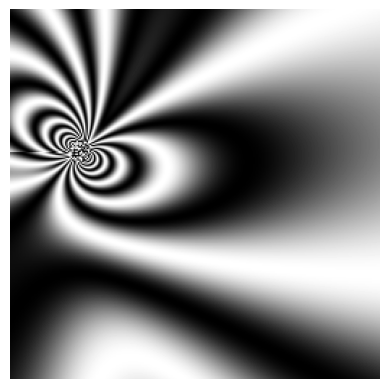

In [56]:
plt.imshow(test_images[0][0][1], cmap = "gray")
plt.axis('off')

In [58]:
prediction = model.predict(test_images[0][0][1,:,:,:].reshape(1,256, 256,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

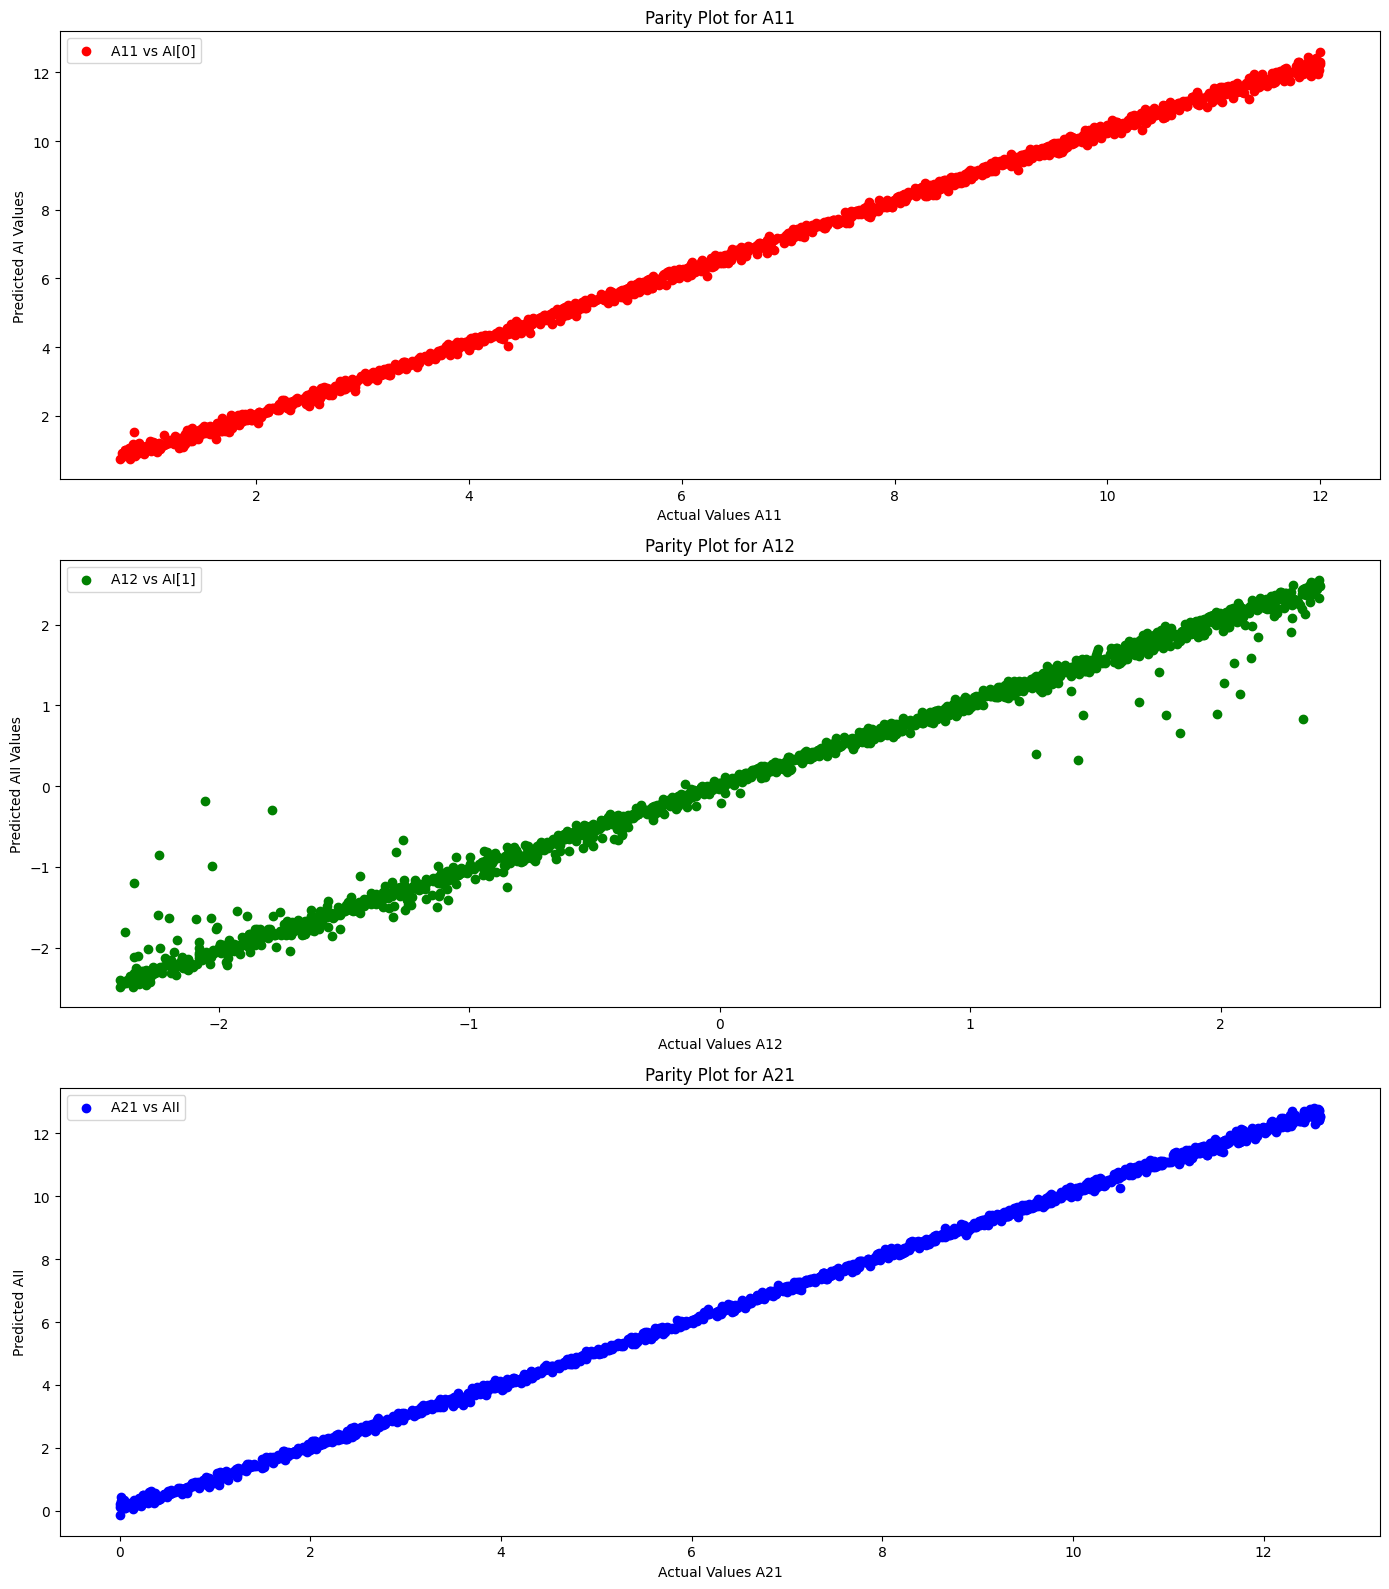

In [71]:
AI_predictions = []
AII_predictions = []
A11_actual = []
A12_actual = []
A21_actual = []
for i in range(len(test_images)):
    images, labels = test_images[i]
    predictions = model.predict(images)
    for j in range(len(predictions)):
        AI_predictions.append(predictions[j][:2])
        AII_predictions.append([predictions[j][2]])
        A11_actual.append(labels[j][0])
        A12_actual.append(labels[j][1])
        A21_actual.append(labels[j][2])

# Convert lists to arrays for plotting
AI_predictions = np.array(AI_predictions)
AII_predictions = np.array(AII_predictions)
A11_actual = np.array(A11_actual)
A12_actual = np.array(A12_actual)
A21_actual = np.array(A21_actual)

# Plot parity between AI and actual values
plt.figure(figsize=(14, 16))

plt.subplot(3, 1, 1)
plt.scatter(A11_actual, AI_predictions[:, 0], color='r', label='A11 vs AI[0]')
plt.xlabel('Actual Values A11')
plt.ylabel('Predicted AI Values')
plt.title('Parity Plot for A11')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(A12_actual, AI_predictions[:, 1], color='g', label='A12 vs AI[1]')
plt.xlabel('Actual Values A12')
plt.ylabel('Predicted AII Values')
plt.title('Parity Plot for A12')
plt.legend()

# Plot parity between AII and actual values
plt.subplot(3, 1, 3)
plt.scatter(A21_actual, AII_predictions[:, 0], color='b', label='A21 vs AII')
plt.xlabel('Actual Values A21')
plt.ylabel('Predicted AII')
plt.title('Parity Plot for A21')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
AI = [prediction[0,0], prediction[0,1]]
AII = [prediction[0,2], 0]

In [30]:
import math


t = 6 #thickness
F = 12 # F_sigma
w = 256
h = 256
mf = 0.0125
cr_x = 99
cr_y = 99
alpha = 0
p = len(AI)
q = len(AII)

sigmax = np.zeros((h, w))
sigmay = np.zeros((h, w))
towxy = np.zeros((h, w))
ps_diff = np.zeros((h, w))
N = np.zeros((h, w))
I = np.zeros((h, w))

for m in range(w):
    for n in range(h):
        x = (m - cr_x)* mf
        y = (cr_y - n) * mf

        r1 = math.sqrt(x**2 + y**2)
        theta1 = math.atan2(y, x)

        x1 = r1 * math.cos(theta1 + alpha)
        y1 = r1 * math.sin(theta1 + alpha)

        r = math.sqrt(x1**2 + y1**2)
        theta = math.atan2(y1, x1)


        try:

            for i in range(1, p+1):
                 sigmax[n,m] = sigmax[n,m] + (((i/2)*AI[i-1] * (r**((i-2)/2)))*(((2+((-1)**i) + i/2)* math.cos((i/2-1)*theta))-((i/2-1)*math.cos((i/2-3)*theta))))
                 sigmay[n,m] = sigmay[n,m] + (((i/2)*AI[i-1]* (r**((i-2)/2)))*(((2-(-1)**i - i/2)*math.cos((i/2-1)*theta))+((i/2-1)*math.cos((i/2-3)*theta))))
                 towxy[n,m] = towxy[n,m] + (((i/2)*AI[i-1] * (r**((i-2)/2)))*((-((-1)**i +i/2)*math.sin((i/2-1)*theta))+ ((i/2-1)*math.sin((i/2-3)*theta))))


            for i in range(1, q+1):
                sigmax[n,m] = sigmax[n,m] -(((i/2)*AII[i-1] * r**((i-2)/2))*(((2-(-1)**i + i/2)*math.sin((i/2-1)*theta))-((i/2-1)*math.sin((i/2-3)*theta))))
                sigmay[n,m] = sigmay[n,m]-(((i/2)*AII[i-1] * r**((i-2)/2))*(((2+(-1)**i - i/2)*math.sin((i/2-1)*theta))+((i/2-1)*math.sin((i/2-3)*theta))))
                towxy[n,m] = towxy[n,m]-(((i/2)*AII[i-1]* r**((i-2)/2))*((-((-1)**i - i/2)*math.cos((i/2-1)*theta))-((i/2-1)*math.cos((i/2-3)*theta))))

            ps_diff[n,m] = 2 * math.sqrt(((sigmax[n,m]-sigmay[n,m])/2)**2 + (towxy[n,m])**2)
            N[n,m] = t * ps_diff[n,m] / F
            I[n,m] = 255 * math.sin(math.pi*N[n,m])**2

        except ZeroDivisionError:
            sigmax[n,m] = 0
            sigmay[n,m] = 0
            towxy[n,m] = 0
            ps_diff[n,m] = 0
            N[n,m] = 0
            I[n,m] = 0

In [31]:
test_images[0][0][1,:,:,:].shape

(256, 256, 1)

In [33]:
Reconstructed_Image = I.reshape(256,256,1)

Text(0.5, 1.0, 'Predicted')

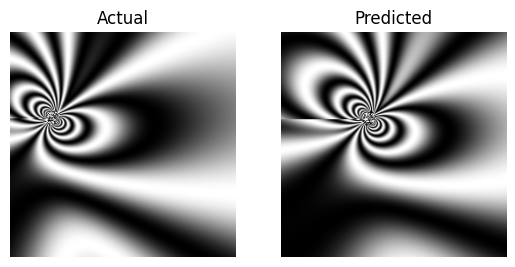

In [34]:
plt.subplot(1,2,1)
plt.imshow(test_images[0][0][1], cmap = "gray")
plt.axis('off')
plt.title('Actual')
plt.subplot(1,2,2)
plt.imshow(Reconstructed_Image, cmap = "gray")
plt.axis('off')
plt.title('Predicted')

In [36]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [37]:
test_image_1 = test_images[0][0][1,:,:,:].astype(np.float32)
test_image_2 = Reconstructed_Image.astype(np.float32)

# Calculate SSIM
ssim_index = ssim(test_image_1.squeeze(), test_image_2.squeeze(), data_range=test_image_2.max() - test_image_2.min())

# Calculate PSNR
psnr_value = psnr(test_image_1.squeeze(), test_image_2.squeeze(), data_range=test_image_2.max() - test_image_2.min())

print("SSIM:", ssim_index)
print("PSNR:", psnr_value)

SSIM: 0.08951518778358572
PSNR: 5.240742011330527


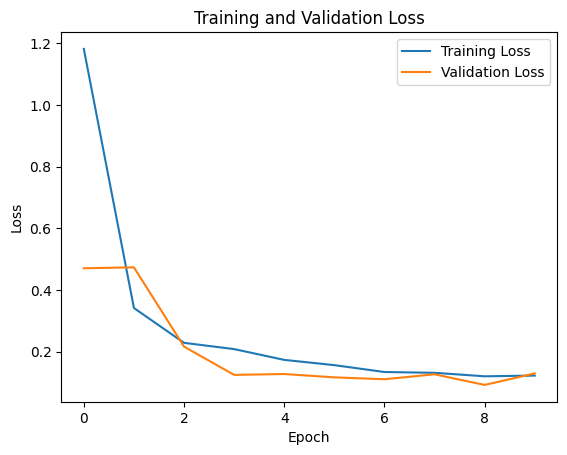

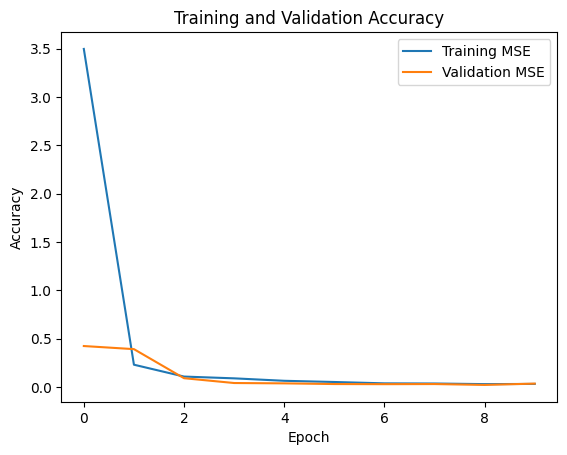

In [38]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.plot(H1.history['loss'], label='Training Loss')
plt.plot(H1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(H1.history['mse'], label='Training MSE')
plt.plot(H1.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
